In [1]:
!pip install -Uqq fastai 'duckduckgo_search>=6.2'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.

In [6]:
from duckduckgo_search import DDGS
from fastcore.all import *
import time, json

def search_images(keywords, max_images=200):
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('hot dog photos', max_images=1)
urls

(#1) ['https://www.tasteofhome.com/wp-content/uploads/2019/04/Chicago-hot-dog_shutterstock_150836300.jpg']

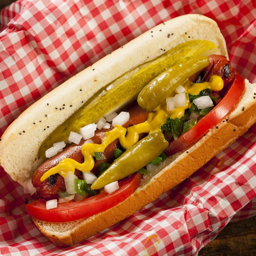

In [14]:
from fastdownload import download_url
from fastai.vision.all import *

destination = 'hotdog.jpg'
download_url(urls[0], dest, show_progress=False)

img = Image.open(destination)
img.to_thumb(256, 256)

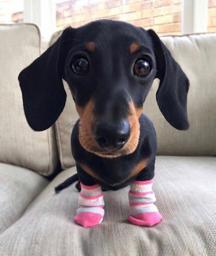

In [10]:
download_url(search_images('sausage dog photos', max_images=1)[0], 'sausage_dog.jpg', show_progress=False)
Image.open('sausage_dog.jpg').to_thumb(256, 256)

In [12]:
searches = 'hot dog', 'sausage dog'
path = Path('hot_dog_or_not')

for keyword in searches:
  destination = (path/keyword)
  destination.mkdir(exist_ok=True, parents=True)
  download_images(destination, urls=search_images(f'{keyword} photo'))
  time.sleep(5)
  resize_images(path/keyword, max_size=400, destination=path/keyword)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
failed_imgs = verify_images(get_image_files(path))
failed_imgs.map(Path.unlink)
len(failed_imgs)

7

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


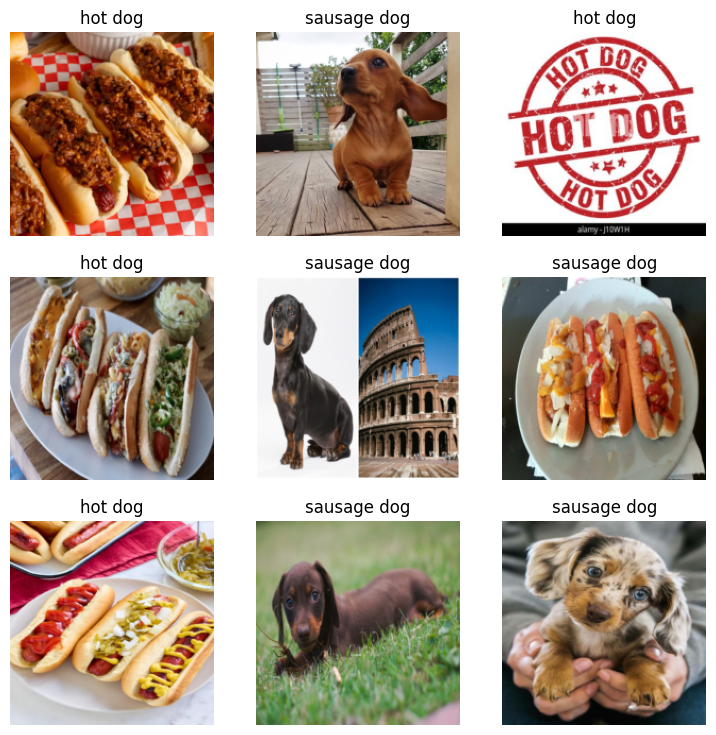

In [16]:
data_loaders = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # (input, output)
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 20% of data dedicated to validation
    get_y=parent_label, # name of the folder
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32) # 32 imagens processadas por vez

data_loaders.show_batch(max_n=9)

In [17]:
learn = vision_learner(data_loaders, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 47.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.876502,0.659308,0.084507,01:01


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.329974,0.494672,0.070423,01:18
1,0.196927,0.506566,0.084507,01:13
2,0.125963,0.492226,0.084507,01:12


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

In [22]:
is_hot_dog,_,probs = learn.predict(PILImage.create('hotdog.jpg'))
print(f'This is a: {is_hot_dog}.')
print(f"Probability it's a hot dog: {probs[0]:.4f}")

This is a: hot dog.
Probability it's a hot dog: 0.9990
